In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import axes3d

points = 1000

data = np.zeros([points,3])
x = np.random.rand(points)*100
y = np.random.rand(points)*100
z = np.sin(x/100*6.28*2)

Returns array[points,] where each item is True or False, based on condition

In [115]:
triang = mtri.Triangulation(x, y)

<b>triang contains an unstructured triangular grid from (x,y) coordinates:</b><br>
a) (triang.x, triang.y) are all the points on the plane (x,y)<br>
b) triang.triangles is an array in which each rows indicate which 3 points from (a) make each triangle<br> 
c) triang.mask can be used to mask out unwanted triangles that can appear at the edge of the 3D graph due to the algorithm that is used which is Delaunay triangulation)
<br><br>
More details here https://matplotlib.org/api/tri_api.html#matplotlib.tri.Triangulation

isBad[...] returns array of shape triang.triangles where each element is used as index for isBad
np.any return an array[nrTriangles,] where you have True if any element in row was true

In [116]:
isBad = np.where((x<1) | (x>99) | (y<1) | (y>99), True, False)

mask = np.any(isBad[triang.triangles],axis=1)
triang.set_mask(mask)

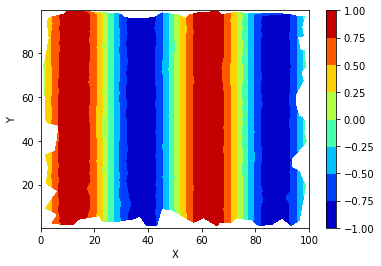

In [117]:
fig1 = plt.figure(1)
ax = fig1.add_subplot(1,1,1)

cset = ax.tricontourf(triang, z, cmap='jet')

plt.colorbar(cset)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

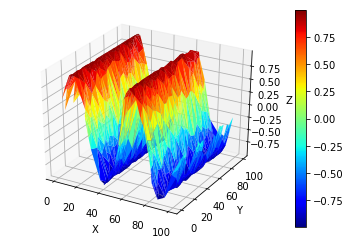

In [118]:
fig2 = plt.figure(2)
ax = fig2.add_subplot(1,1,1, projection='3d')

cset = ax.plot_trisurf(triang, z, cmap='jet')

plt.colorbar(cset)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()